In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
import matplotlib.pyplot as plt
import csv
import math
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import statsmodels.api as sm
import scipy
import seaborn as sns

# IMPORT MY LATEX SO I CAN USE \TEXTSC
import matplotlib as mpl
mpl.rc('text', **{'usetex':True})
import re
plt.rc( 'font', family = 'serif')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data_file = f'../data/pic/2021-08-30_strong_scaling/pic_strong_scaling_combined_clean.txt'
data_file_noodf = f'../data/pic/2021-08-30_strong_scaling/pic_strong_scaling_noodf_clean.txt'
data_file_nolb = f'../data/pic/2021-08-30_strong_scaling/pic_strong_scaling_nolb_clean.txt'
df = pd.read_csv(data_file)
df_noodf = pd.read_csv(data_file_noodf)
df_nolb = pd.read_csv(data_file_nolb)
df.columns
df_noodf["Framework"] = 'Charm4Py'
df_nolb["Framework"] = 'Charm4Py (O)'
print(df)
df["Framework"] = df["Framework"].replace('Charm4Py', 'Charm4Py (O,LB)')
df_mpi = df[df["Framework"] == 'mpi4py']
df_chpy = df[df["Framework"] == 'Charm4Py (O,LB)']
df = pd.concat([df_mpi, df_noodf,df_nolb, df_chpy]).reset_index(drop=True)

     Trial Framework  Num Processes  Num Chares  Simulation Time  \
0        1  Charm4Py            192        1536        39.298447   
1        1  Charm4Py             48         384        77.344707   
2        1    mpi4py             96          96       117.168679   
3        1    mpi4py            384         384        33.962358   
4        1  Charm4Py            768        6144        42.286405   
..     ...       ...            ...         ...              ...   
115     10  Charm4Py            768        6144        42.410377   
116     10    mpi4py             48          48       203.448200   
117     10  Charm4Py             96         768        52.837374   
118     10    mpi4py            768         768        17.459171   
119     10  Charm4Py            384        3072        37.788574   

     Num Iterations  
0              1000  
1              1000  
2              1000  
3              1000  
4              1000  
..              ...  
115            1000  
116    

[285.79617374 207.64117756 117.42481291  63.55800967  32.48147798
  17.52373788]
[108.50860472  77.58971808  52.39310253  39.24283872  38.42623627
  43.10288744]
2.6338572363375623
2.676142956802168
2.2412265594155123
1.6196078507804308
0.8452942865922424
0.4065560087609408


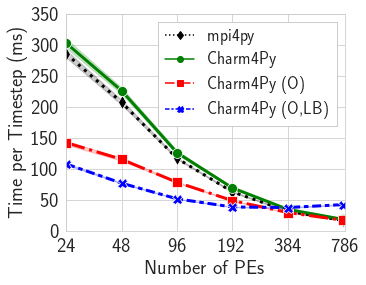

In [6]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Num Processes", y="Simulation Time", data=df,hue="Framework", style="Framework",
              palette = ['black', 'green', 'red', 'blue'],ax=ax,ci=99, markers = ['d','o','s','X'], dashes=True,
              linewidth=3, markersize=10)
ax.lines[0].set_linestyle(':')
ax.lines[1].set_linestyle("-")
ax.lines[2].set_linestyle("-.")
ha, la = ax.get_legend_handles_labels()
ha[0].set_linestyle(':')
ha[1].set_linestyle('-')
ha[2].set_linestyle('-.')
ax.set_xlim(24,768)
ax.set_xscale('log', base=2)
ax.set_ylabel('Time per Timestep (ms)', fontsize=20)
ax.set_xlabel('Number of PEs', fontsize=20)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_ylim(0,350)
ax.set_yticks([0,50,100,150,200,250,300,350])
ax.set_xticks([24, 48, 96, 192, 384, 786])
ax.set_xticklabels([24, 48, 96, 192, 384, 786])
ax.set_yticklabels([0,50,100,150,200,250,300,350])
# ax.set_yscale('log', base=2)
ax.legend(ha,la,fontsize = 17, loc = 'upper right', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
# plt.savefig('pic_strong_scaling.pdf', bbox_inches='tight', dpi=300)
lines = ax.get_lines()
mpi_lat = lines[0].get_ydata()
ch_lat = lines[3].get_ydata()
print(mpi_lat)
print(ch_lat)
for chp, ch in zip(mpi_lat, ch_lat):
    perc_diff = chp/ch
    print(perc_diff)
    
# print(mpip_lat)
# print(mpi_lat)
# for mpip, mpi in zip(mpip_lat, mpi_lat):
#     perc_diff = 100*(mpip-mpi)/mpi
#     print(perc_diff)

In [160]:
# How does ODF change the distribution of particles?
noodf = pd.read_csv('../data/pic/2021-09-06_tracing/particlecounts_noodf.csv')
odf = pd.read_csv('../data/pic/2021-09-06_tracing/particlecounts_odf.csv')
odf = odf.groupby("Processor").sum().reset_index(drop=False)
odf

,Processor,Chare,Particles,Left,Right,Bottom,Top
0,0,28,23816,10500,13500,0,2000
1,1,92,1157,34499,37497,0,2000
2,2,156,23933,10500,13500,2000,4000
3,3,220,1166,34499,37497,2000,4000
4,4,284,23743,10500,13500,4000,6000
5,5,348,1200,34499,37497,4000,6000
6,6,412,23754,10500,13500,6000,8000
7,7,476,1117,34499,37497,6000,8000
8,8,540,23790,10500,13500,8000,10000
9,9,604,1189,34499,37497,8000,10000


<AxesSubplot:xlabel='Processor'>

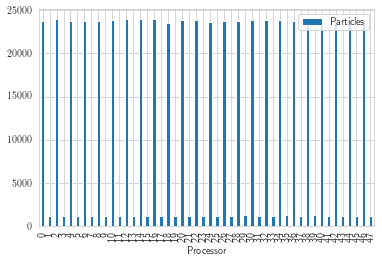

In [162]:
odf["Processor"]
odf.sort_values("Processor", inplace=True)
noodf.sort_values("Processor", inplace=True)
odf.plot(kind='bar',x="Processor", y="Particles")
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     display(odf)
#     display(noodf)

<AxesSubplot:xlabel='Processor'>

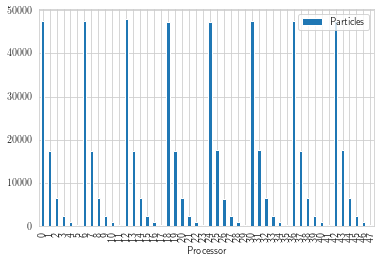

In [61]:
odf["Processor"]
noodf.sort_values("Processor", inplace=True)
noodf.plot(kind='bar',x="Processor", y="Particles")

In [119]:
# odf, chare array is: 16 24
# noodf, chare array is: 6 8
# Rather than look at processors, we should look at the grid itself. How many particles per region of the grid?
# sns.distplot(noodf, x="Left")
from collections import defaultdict
def map_to_larger(bins, particle):
    
    def fits(b, particle):
        x, y = particle
        xbs, xbe, ybs, ybe = b
        
        return x >= xbs and x <= xbe and y >= ybs and y <= ybe
        
    for b in bins:
        if fits(b, particle):
            return b
#     print(f"Unable to map bin {newbin}")
    
    
bounds = noodf[["Left","Right","Bottom","Top","Particles"]]
pcounts = defaultdict(int)
xbins = set()
x_starts = set()
x_ends = set()
ybins = set()
y_starts = set()
y_ends = set()
bins = set()
for row in bounds.values:
    key = tuple(row[0:-1])
    pcounts[key] += row[-1]
    xbins.add(tuple(key[0:2]))
    ybins.add(tuple(key[2:4]))
    bins.add(key[0:4])
bounds = odf[['X','Y']]
pcounts_odf = defaultdict(int)
for row in bounds.values:
    # I need to find the biggest start coordinate that's less than x
    # I need to find the smallest end coordinate greater than 
    x,y = row
    key = map_to_larger(bins, (x,y))
    pcounts_odf[key] += 1

for k,v in pcounts_odf.items():
    if pcounts[k] != v:
        print(":(")
print(pcounts_odf==pcounts_odf)

True
